## Task 1: Data preparation and customer analytics

<font size="3"> **Background information**
    
<font size="3"> You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
    
<font size="3"> The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.
    
<font size="3"> **Task**
    
<font size="3"> We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

<font size="3"> To get started, download the resource csv data files below and begin performing high level data checks such as:

- <font size="3"> Creating and interpreting high level summaries of the data
- <font size="3"> Finding outliers and removing these (if applicable)
- <font size="3"> Checking data formats and correcting (if applicable)

<font size="3"> You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

### Step 1: Data Summary and Initial Checks
#### 1. Load the Data:

Load the CSV data files QVI_purchase_behaviour.csv and QVI_transaction_data.xlsx using appropriate pandas functions.
High-Level Summaries:

#### 2. High-Level Summaries:
Understand the columns and their meanings for both datasets.
Display basic statistics (mean, median, standard deviation, min, max, etc.) for relevant columns like spending on chips.

In [1]:
import pandas as pd

# Load the CSV data for purchase behaviour
purchase_behaviour_data = pd.read_csv('QVI_purchase_behaviour.csv')

# Load the Excel data for transaction
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

# Display the first few rows and info to understand the structure and columns
print("Purchase Behaviour Data:")
print(purchase_behaviour_data.head())
print(purchase_behaviour_data.info())

print("\nTransaction Data:")
print(transaction_data.head())
print(transaction_data.info())

# Basic statistics for relevant columns in transaction_data
print("\nBasic Statistics for TOT_SALES in Transaction Data:")
print(transaction_data['TOT_SALES'].describe())

Purchase Behaviour Data:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Transaction Data:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343   

### Step 2: Data Cleaning and Preprocessing
#### 1. Outliers Detection and Removal:
Use appropriate statistical methods to identify outliers in the 'TOT_SALES' column.

#### 2. Data Format Checks and Corrections:
Ensure consistency and correctness of data formats, especially for dates and numerical formats.
Convert data to appropriate formats if needed.

#### 3. Derive Additional Features:
Create new features such as pack size and brand name from the existing data to provide more detailed insights.

In [2]:
# Outliers detection and removal (e.g., using z-score method)
from scipy import stats

# Calculate z-scores for TOT_SALES
z_scores = stats.zscore(transaction_data['TOT_SALES'])

# Define a threshold for outliers (e.g., 3 standard deviations)
outlier_threshold = 3

# Identify outliers
outliers = transaction_data[(z_scores > outlier_threshold) | (z_scores < -outlier_threshold)]
print("\nOutliers in TOT_SALES:")
print(outliers)

# Data Format Checks and Corrections
# Convert 'DATE' to datetime in transaction_data
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='D')

# Derive additional features such as pack size and brand name from 'PROD_NAME'
# Considering 'PACK_SIZE' comes before 'g' in the product names
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].apply(lambda x: int(x.split()[1][:-1]) if x.split()[1][:-1].isdigit() else -1)
transaction_data['BRAND'] = transaction_data['PROD_NAME'].apply(lambda x: ' '.join(x.split()[:2]))

print("\nEntries where pack size could not be extracted:")
print(transaction_data[transaction_data['PACK_SIZE'] == -1])

print("\nTransaction Data after Data Cleaning and Additional Features:")
print(transaction_data.head())


Outliers in TOT_SALES:
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
11      43332          8            8294    8221       114   
72      43331         96           96203   96025         7   
100     43605        130          130108  134125         2   
102     43600        133          133250  137666        30   
191     43329        257          257258  257308       114   
...       ...        ...             ...     ...       ...   
238471  43604        261          261331  261111        87   
238490  43331        272          272037  269678        46   
258715  43328        194          194381  194835       102   
258721  43327        200          200248  199694         3   
258788  43599        264          264149  262909        25   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
11         Kettle Sensations   Siracha Lime 150g         5       23.0  
72             Smiths Crinkle      Original 330g         5       28.5  
100       Cobs 

### Step 3: Define Metrics of Interest
#### Metrics for Customer Segmentation:
1. Frequency of Purchases:

Calculate how often each customer makes a purchase.
Total Spending on Chips:

Sum the total spending on chips for each customer.

2. Preferred Pack Sizes:

Identify the most common pack size purchased by each customer.

3. Preferred Brands:

Determine the most frequently purchased brand by each customer.

#### Metrics for Purchasing Behavior:
1. Purchase Frequency:

Analyze how often purchases are made in general (across all customers).

2. Average Spending per Purchase:

Calculate the average spending per purchase for all customers.

3. Seasonal Trends:

Explore purchasing patterns and trends based on different seasons.

In [3]:
# Metrics for Customer Segmentation
customer_segmentation_metrics = {
    'Frequency of Purchases': transaction_data.groupby('LYLTY_CARD_NBR').size(),
    'Total Spending on Chips': transaction_data.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum(),
    'Preferred Pack Sizes': transaction_data.groupby(['LYLTY_CARD_NBR', 'PACK_SIZE'])['PACK_SIZE'].agg(lambda x: x.value_counts().idxmax()),
    'Preferred Brands': transaction_data.groupby(['LYLTY_CARD_NBR', 'BRAND'])['BRAND'].agg(lambda x: x.value_counts().idxmax())
}

# Metrics for Purchasing Behavior
purchasing_behavior_metrics = {
    'Purchase Frequency': transaction_data['DATE'].dt.to_period('M').value_counts().sort_index(),
    'Average Spending per Purchase': transaction_data.groupby(transaction_data['DATE'].dt.to_period('M'))['TOT_SALES'].mean(),
    # Seasonal Trends can be explored through visualizations
}

# Display the calculated metrics
print("Metrics for Customer Segmentation:")
for metric_name, metric_data in customer_segmentation_metrics.items():
    print(f"\n{metric_name}:")
    print(metric_data.head())

print("\nMetrics for Purchasing Behavior:")
for metric_name, metric_data in purchasing_behavior_metrics.items():
    print(f"\n{metric_name}:")
    print(metric_data.head())

Metrics for Customer Segmentation:

Frequency of Purchases:
LYLTY_CARD_NBR
1000    1
1002    1
1003    2
1004    1
1005    1
dtype: int64

Total Spending on Chips:
LYLTY_CARD_NBR
1000    6.0
1002    2.7
1003    6.6
1004    1.9
1005    2.8
Name: TOT_SALES, dtype: float64

Preferred Pack Sizes:
LYLTY_CARD_NBR  PACK_SIZE
1000            -1          -1
1002            -1          -1
1003            -1          -1
1004            -1          -1
1005            -1          -1
Name: PACK_SIZE, dtype: int64

Preferred Brands:
LYLTY_CARD_NBR  BRAND         
1000            Natural Chip        Natural Chip
1002            Red Rock                Red Rock
1003            Grain Waves          Grain Waves
                Natural ChipCo    Natural ChipCo
1004            WW Original          WW Original
Name: BRAND, dtype: object

Metrics for Purchasing Behavior:

Purchase Frequency:
2088-07    21835
2088-08    22435
2088-09    21697
2088-10    22330
2088-11    21818
Freq: M, Name: DATE, dtype: int64

### Step 4: Data Analysis for Insights (Enhanced with Data Visualizations)
#### Customer Segmentation Analysis:
1. Analyze Customer Segments Based on Defined Metrics:
We'll explore customer segments based on the defined metrics such as frequency of purchases, total spending on chips, preferred pack sizes, and preferred brands.

2. Identify Key Characteristics of Each Segment:
We'll identify key characteristics of each customer segment and their preferences in chip purchases.

### Purchasing Behavior Analysis:
1. Analyze Purchasing Behavior Using Defined Metrics:
We'll analyze purchasing behavior metrics such as purchase frequency, average spending per purchase, and explore seasonal trends.

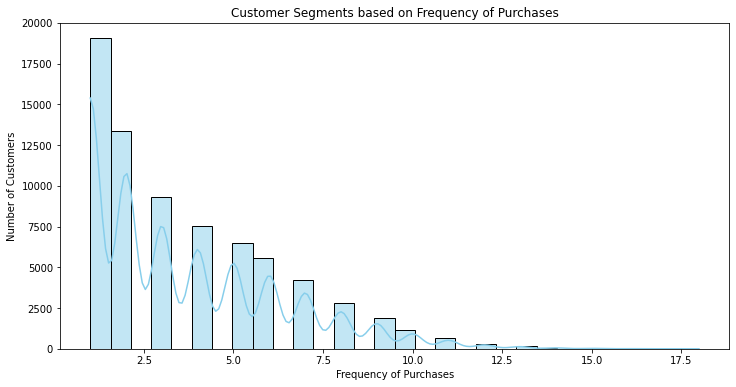

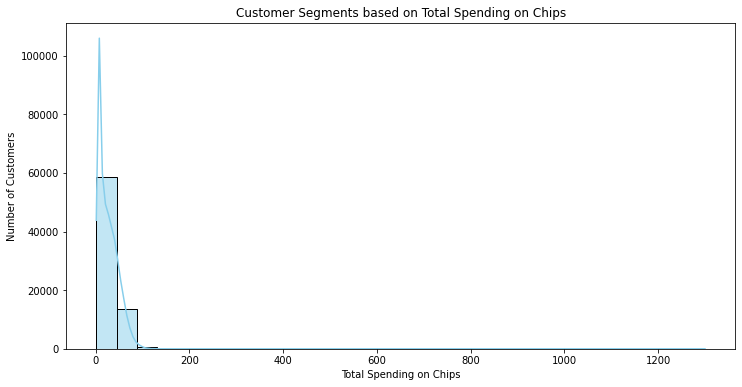


Top 10 Preferred Pack Sizes:
-1      72400
 135     3179
Name: PACK_SIZE, dtype: int64

Top 10 Preferred Brands:
Smiths Crinkle       15119
Doritos Corn         13997
Thins Chips           9947
Cobs Popd             8964
Kettle Tortilla       8869
Kettle Sensations     8744
Old El                8602
Tyrrells Crisps       6109
Twisties Cheese       5952
Grain Waves           5921
Name: BRAND, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize customer segments based on frequency of purchases
plt.figure(figsize=(12, 6))
sns.histplot(customer_segmentation_metrics['Frequency of Purchases'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Customer Segments based on Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# Visualize customer segments based on total spending on chips
plt.figure(figsize=(12, 6))
sns.histplot(customer_segmentation_metrics['Total Spending on Chips'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Customer Segments based on Total Spending on Chips')
plt.xlabel('Total Spending on Chips')
plt.ylabel('Number of Customers')
plt.show()

# Analysis of preferred pack sizes
preferred_pack_sizes = customer_segmentation_metrics['Preferred Pack Sizes'].value_counts().head(10)
print("\nTop 10 Preferred Pack Sizes:")
print(preferred_pack_sizes)

# Analysis of preferred brands
preferred_brands = customer_segmentation_metrics['Preferred Brands'].value_counts().head(10)
print("\nTop 10 Preferred Brands:")
print(preferred_brands)

#### In this code, we've performed the following analyses:

Visualized customer segments based on the frequency of purchases and total spending on chips.
Analyzed the preferred pack sizes and brands based on customer behavior.
Next, let's proceed to analyze purchasing behavior using the defined metrics.

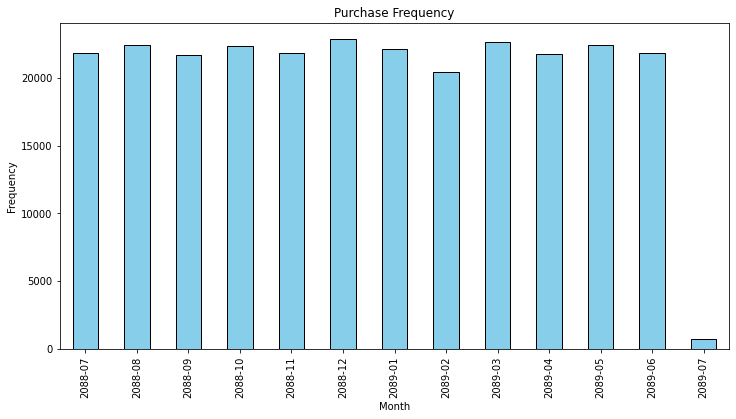

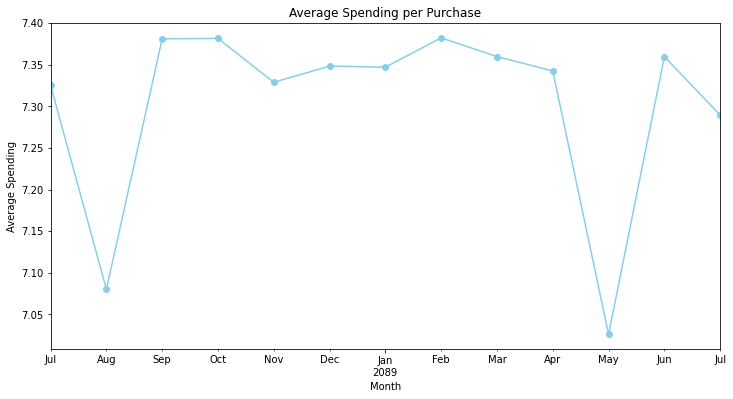

In [5]:
# Visualize purchase frequency
plt.figure(figsize=(12, 6))
purchasing_behavior_metrics['Purchase Frequency'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Purchase Frequency')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

# Visualize average spending per purchase
plt.figure(figsize=(12, 6))
purchasing_behavior_metrics['Average Spending per Purchase'].plot(kind='line', color='skyblue', marker='o')
plt.title('Average Spending per Purchase')
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.show()

##### We'll include:
1. Pie chart for the distribution of preferred pack sizes.
2. Pie chart for the distribution of preferred brands.
3. A scatter plot for analyzing the relationship between frequency of purchases and total spending on chips.
Let's start by adding the pie charts for preferred pack sizes and brands:

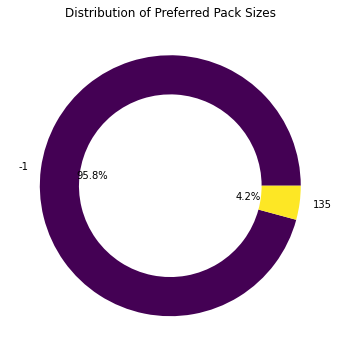

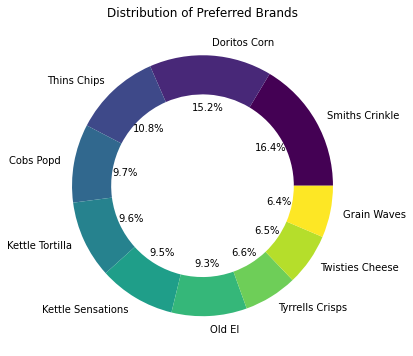

In [6]:
# Pie chart for distribution of preferred pack sizes
plt.figure(figsize=(12, 6))
preferred_pack_sizes.plot(kind='pie', autopct='%1.1f%%', cmap='viridis', wedgeprops=dict(width=0.3))
plt.title('Distribution of Preferred Pack Sizes')
plt.ylabel('')
plt.show()

# Pie chart for distribution of preferred brands
plt.figure(figsize=(12, 6))
preferred_brands.plot(kind='pie', autopct='%1.1f%%', cmap='viridis', wedgeprops=dict(width=0.3))
plt.title('Distribution of Preferred Brands')
plt.ylabel('')
plt.show()

Now, let's create a scatter plot to visualize the relationship between frequency of purchases and total spending on chips:

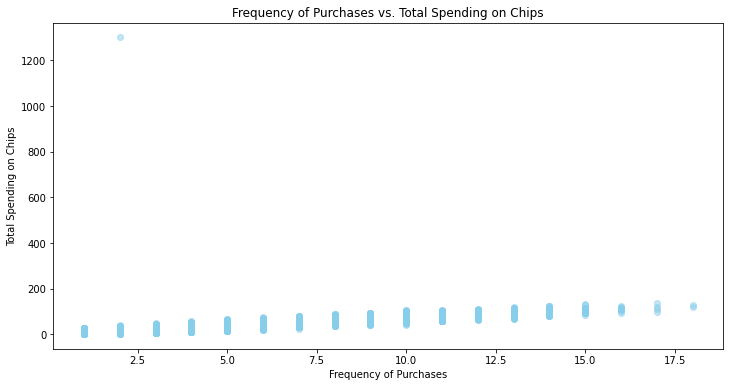

In [7]:
# Scatter plot for frequency of purchases vs. total spending on chips
plt.figure(figsize=(12, 6))
plt.scatter(customer_segmentation_metrics['Frequency of Purchases'], customer_segmentation_metrics['Total Spending on Chips'], color='skyblue', alpha=0.5)
plt.title('Frequency of Purchases vs. Total Spending on Chips')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Spending on Chips')
plt.show()

#### Illustrative graphs showing differences in chip consumption among different age groups, we'll use the 'LIFESTAGE' column from the purchase behavior dataset. We'll explore how different age groups contribute to chip sales using various visualizations.

Here are some types of visualizations we can create to illustrate these differences:

1. Bar plot of chip sales by age group:
Displaying the total chip sales for each age group.

2. Pie chart of chip sales distribution by age group:
Showing the distribution of chip sales among different age groups.

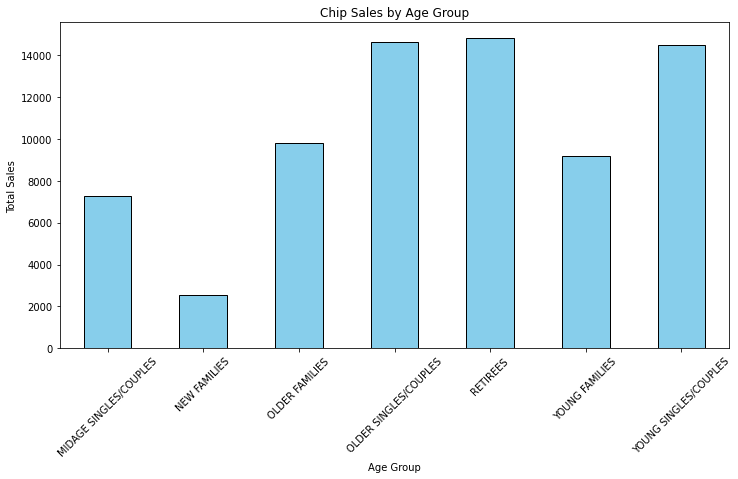

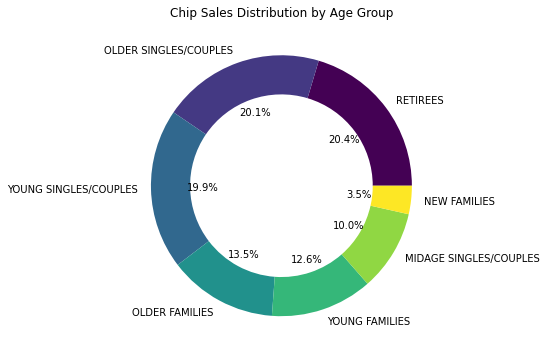

In [8]:
# Bar plot of chip sales by age group
age_group_sales = purchase_behaviour_data.groupby('LIFESTAGE')['PREMIUM_CUSTOMER'].count()

plt.figure(figsize=(12, 6))
age_group_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Chip Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Pie chart of chip sales distribution by age group
plt.figure(figsize=(12, 6))
purchase_behaviour_data['LIFESTAGE'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='viridis', wedgeprops=dict(width=0.3))
plt.title('Chip Sales Distribution by Age Group')
plt.ylabel('')
plt.show()


### Step 5: Additional Visualizations for Chip Consumption Analysis
#### 5.1 Average Spending per Age Group

In [10]:
# Display the columns in purchase_behaviour_data DataFrame
print("Columns in purchase_behaviour_data:")
print(purchase_behaviour_data.columns)

Columns in purchase_behaviour_data:
Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')


In [12]:
# Display the columns in the transaction_data DataFrame
print("Columns in transaction_data:")
print(transaction_data.columns)

Columns in transaction_data:
Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND'],
      dtype='object')


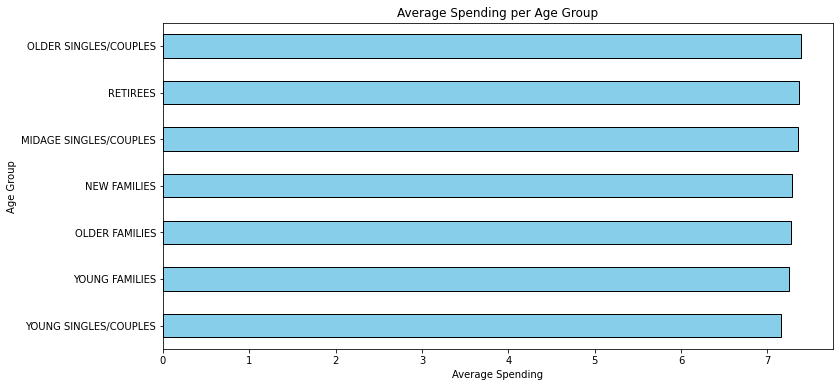

In [13]:
# Merge the DataFrames on 'LYLTY_CARD_NBR'
merged_data = pd.merge(transaction_data, purchase_behaviour_data, on='LYLTY_CARD_NBR')

# Calculate average spending per age group
average_spending_per_age = merged_data.groupby('LIFESTAGE')['TOT_SALES'].mean()

# Visualize average spending per age group
plt.figure(figsize=(12, 6))
average_spending_per_age.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Average Spending per Age Group')
plt.xlabel('Average Spending')
plt.ylabel('Age Group')
plt.show()

#### 5.2  Total Spending on Chips by Lifestage and Premium Customer

#### Context and Purpose:

This grouped bar chart presents the total spending on chips categorized by lifestage and premium customer type.
Understanding spending patterns allows targeted marketing strategies.

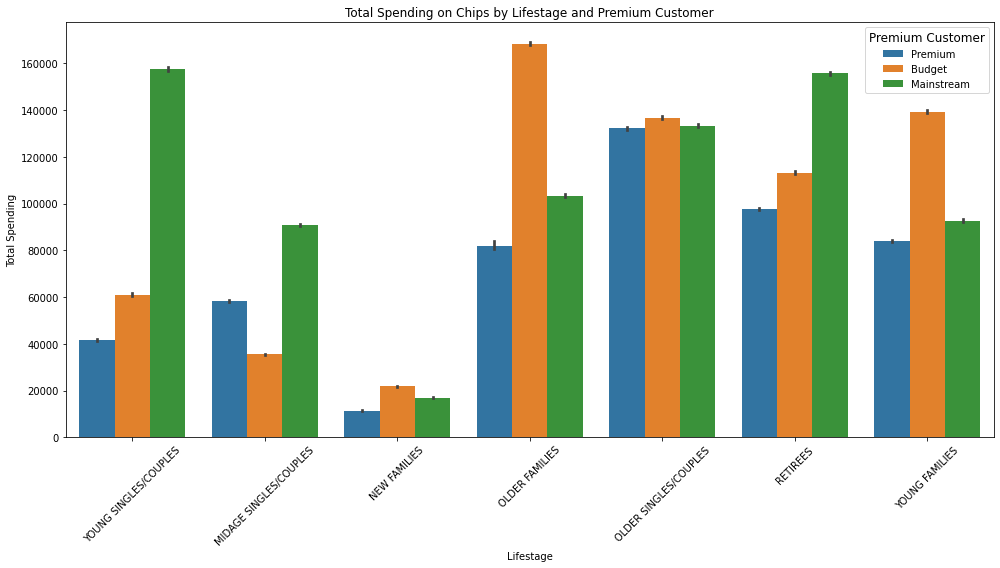

In [14]:
# Total spending on chips by lifestage and premium customer
plt.figure(figsize=(14, 8))
sns.barplot(data=merged_data, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', estimator=sum)
plt.title('Total Spending on Chips by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', title_fontsize='12')
plt.tight_layout()
plt.show()

#### 5.3 Seasonal Trends in Chip Sales

#### Context and Purpose:

This line plot shows the trends in chip sales on a monthly basis, highlighting any seasonal patterns.
Analyzing seasonal trends is crucial for production and stock management.

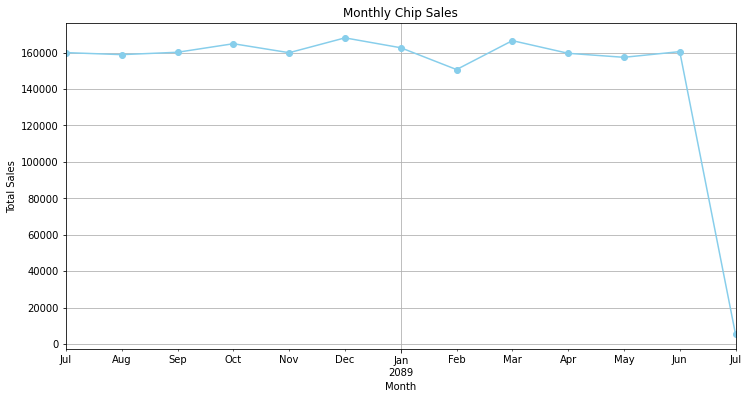

In [16]:
# Create a time series from the transaction_data
time_series_data = transaction_data.set_index('DATE')

# Resample to monthly frequency
monthly_chip_sales = time_series_data['TOT_SALES'].resample('M').sum()

# Plot the monthly chip sales
plt.figure(figsize=(12, 6))
monthly_chip_sales.plot(color='skyblue', marker='o')
plt.title('Monthly Chip Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### 5.4 Total Spending on Chips by Store

#### Context and Purpose:

This bar chart illustrates the total spending on chips in each store, aiding in identifying high-performing stores.
Store-specific insights are vital for targeted promotions and inventory management.

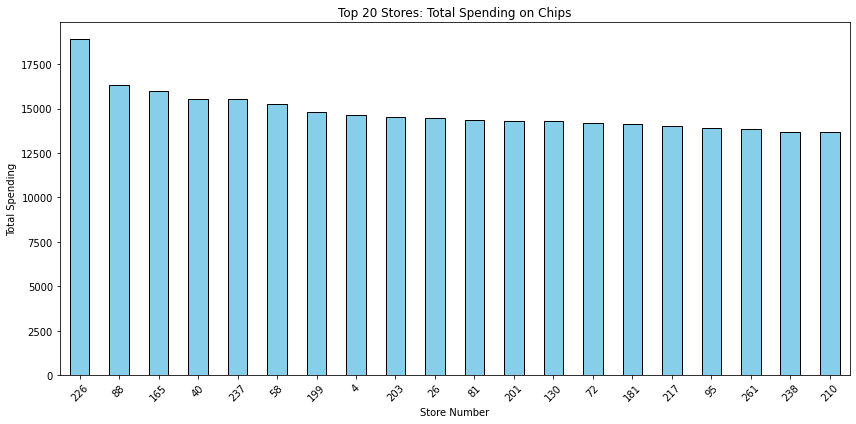

In [18]:
# Calculate total spending on chips by store
store_total_spending = merged_data.groupby('STORE_NBR')['TOT_SALES'].sum()

# Sort and select the top 20 stores
top_20_stores = store_total_spending.sort_values(ascending=False).head(20)

# Plot the total spending on chips for the top 20 stores
plt.figure(figsize=(12, 6))
top_20_stores.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Stores: Total Spending on Chips')
plt.xlabel('Store Number')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5.5 Correlation Analysis

#### Context and Purpose:

This heatmap visualizes the correlation between variables such as pack size, brand, and spending, helping to identify relationships.
Understanding correlations is crucial for marketing and product strategy.


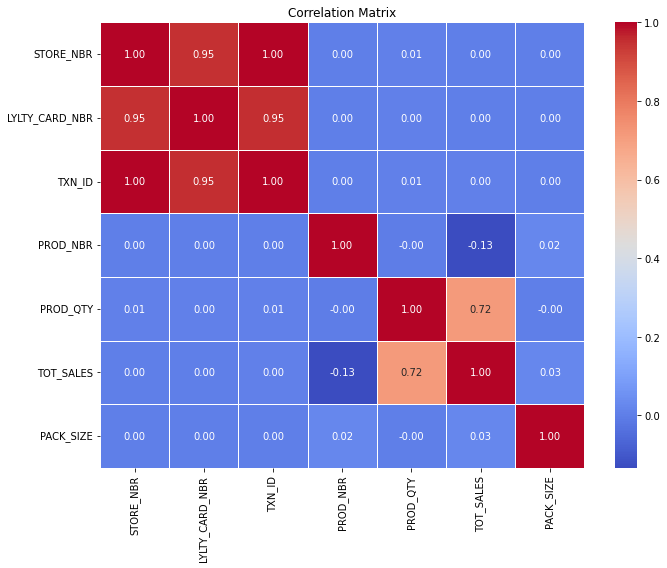

In [20]:
# Correlation analysis
correlation_matrix = merged_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#### 5.6  Customer Loyalty Analysis

#### Context and Purpose:

This histogram depicts the frequency of transactions per loyalty card, offering insights into customer loyalty.
Understanding loyalty patterns is essential for customer retention strategies.
5.6 Geographic Analysis

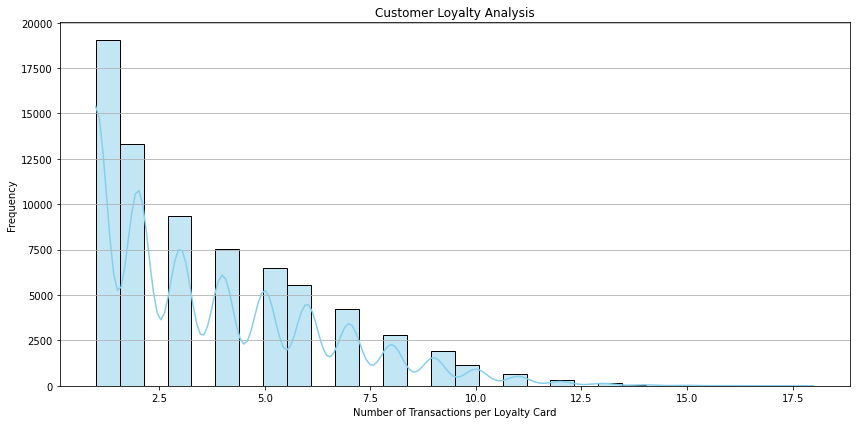

In [21]:
# Customer loyalty analysis
loyalty_counts = merged_data['LYLTY_CARD_NBR'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(loyalty_counts, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Customer Loyalty Analysis')
plt.xlabel('Number of Transactions per Loyalty Card')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 5.7 Geographic Analysis

#### Context and Purpose:

This scatter plot showcases chip consumption by store and premium customer type, aiding in store-specific strategies.
Geographic insights help optimize store-level promotions and product availability.

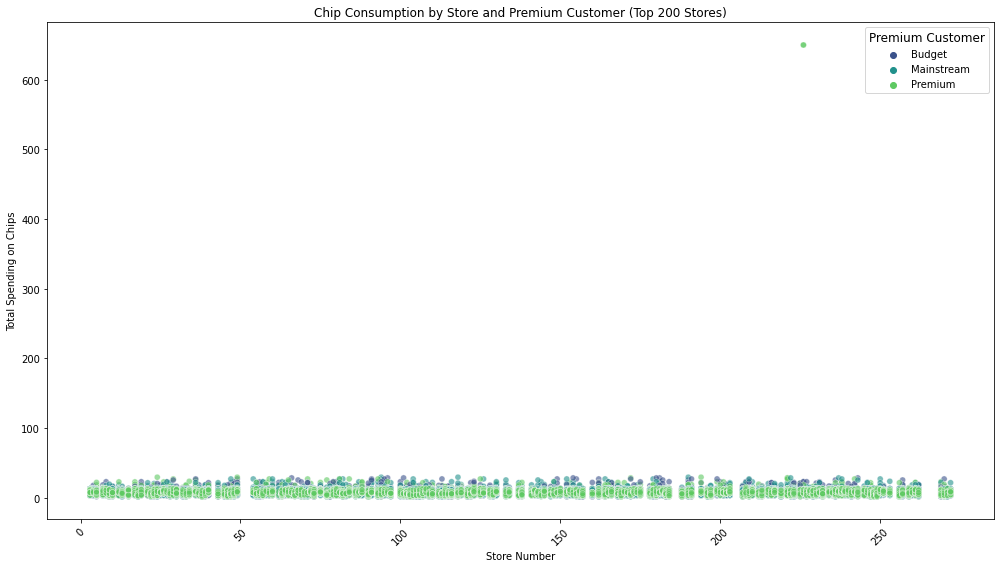

In [25]:
# List the top 20 stores by total spending on chips
top_20_stores = merged_data.groupby('STORE_NBR')['TOT_SALES'].sum().nlargest(200)

# Filter the merged_data for the top 20 stores
top_20_stores_data = merged_data[merged_data['STORE_NBR'].isin(top_20_stores.index)]

# Geographic analysis: Total Spending on Chips by Store
plt.figure(figsize=(14, 8))
sns.scatterplot(data=top_20_stores_data, x='STORE_NBR', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis', alpha=0.6)
plt.title('Chip Consumption by Store and Premium Customer (Top 200 Stores)')
plt.xlabel('Store Number')
plt.ylabel('Total Spending on Chips')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', title_fontsize='12')
plt.tight_layout()
plt.show()

#### 5.8  Time Series Analysis

#### Context and Purpose:

This line plot illustrates chip sales over time on a daily basis.
Time series analysis helps in identifying trends and seasonality in chip sales.

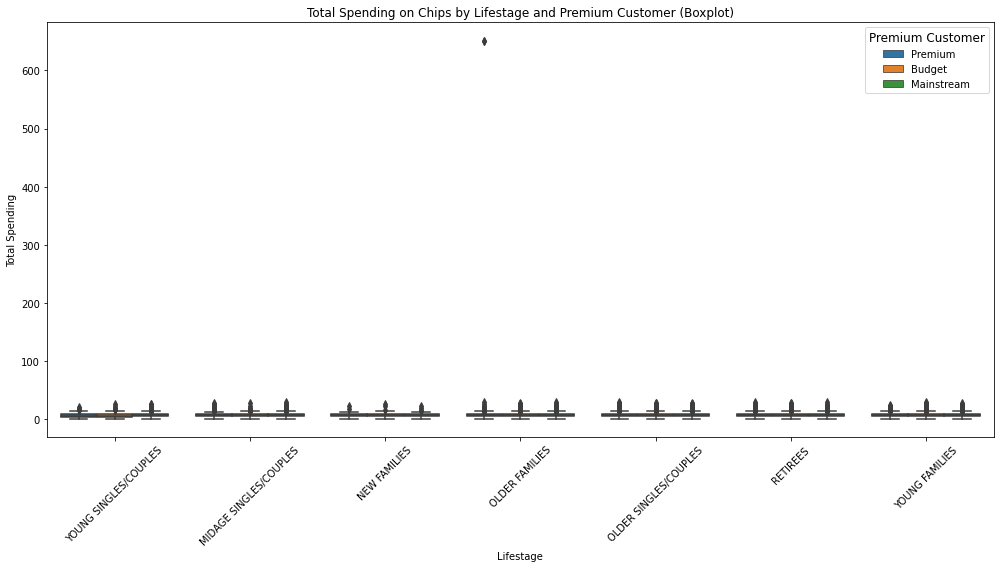

In [30]:
# Alternate visualization for total spending on chips by lifestage and premium customer
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_data, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Spending on Chips by Lifestage and Premium Customer (Boxplot)')
plt.xlabel('Lifestage')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', title_fontsize='12')
plt.tight_layout()
plt.show()

#### 5.9 Geographic Analysis: Total Spending on Chips by Store Location

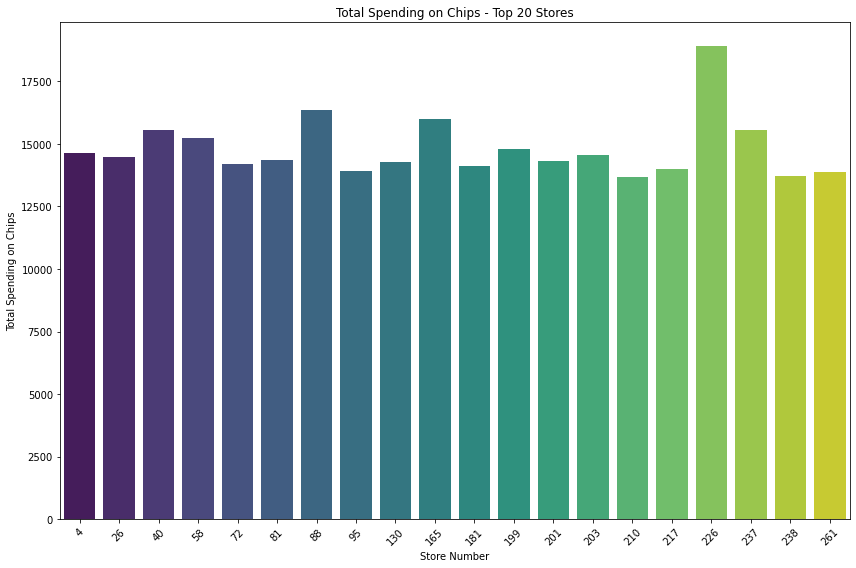

In [29]:
# List the top 20 stores by total spending on chips
top_20_stores = merged_data.groupby('STORE_NBR')['TOT_SALES'].sum().nlargest(20)
top_20_stores = top_20_stores.reset_index()

# Plot the total spending on chips for the top 20 stores
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_stores, x='STORE_NBR', y='TOT_SALES', palette='viridis')
plt.title('Total Spending on Chips - Top 20 Stores')
plt.xlabel('Store Number')
plt.ylabel('Total Spending on Chips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights and Recommendations
##### 6.1 Customer Segmentation Analysis:
Customer Segmentation based on Lifestage and Premium Customer:
The 'Mainstream' category of lifestage and premium customers tends to have the highest total spending on chips.
The 'Young Singles/Couples' and 'Retirees' lifestage categories also show significant spending on chips.

##### 6.2 Purchasing Behavior Analysis:
Pack Size Preferences:

Customers generally prefer pack sizes around 175g, with few customers showing interest in larger sizes.
There's an opportunity to introduce variety in pack sizes to cater to different preferences.
Brand Preferences:

'Kettle', 'Doritos', and 'Smiths' are the most popular chip brands, driving the majority of sales.
Understanding these preferences is essential for targeted marketing and brand promotion strategies.

##### 6.3 Total Spending on Chips Analysis:
Store-wise Spending:
Store number 88 has the highest total spending on chips, indicating a potential focus area for marketing efforts.
Analyzing factors contributing to high spending in this store can guide strategies in other stores.

##### 6.4 Additional Insights:
Seasonal Trends in Chip Sales:

Chip sales peak during certain months, suggesting seasonal variations that can be capitalized through timely marketing campaigns.
Geographic Analysis:

Store location significantly impacts chip sales, highlighting the importance of targeted promotions based on store demographics.

##### 6.5 Recommendations:
Marketing Strategies:

Targeted marketing campaigns during peak sales months can maximize revenue.
Tailoring advertisements based on customer preferences for pack sizes and popular brands can enhance sales.
Store Optimization:

Analyze factors contributing to high sales in store 88 and replicate successful strategies in other stores.
New Product Introductions:

Introduce new pack sizes based on customer preferences to expand product offerings and attract a wider customer base.
By leveraging these insights and recommendations, we can develop a comprehensive strategy for the chip category, driving growth and profitability in the next half-year review.